In [1]:
import pandas as pd
import os
from settings import comparison_dict

In [2]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in comparison_dict.items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [3]:
geog = 'rg'

# Population

In [4]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_population.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='Persons')

In [5]:
df = pd.read_csv(r'\\modelstation3\\c$\\Workspace\\sc_new_vot_SCEN1_2018\\soundcast\\outputs\\compare\\rg\\1_population.csv')

In [6]:
df.plot(kind='barh', alpha=0.6)
# df.to_csv(os.path.join(scen_path,r'outputs\compare\inputs',fname)
df

,hh_rg_proposed,Households,Persons
0,Core,"23,428","48,801"
1,HCT,584,"1,726"
2,Metro,"108,805","178,334"
3,UU,212,637


# Employment

In [7]:
df = load_data('2_employment.csv', geog)
df['Workers'] = df['Paid Full-Time Worker']+df['Paid Part-Time Worker']
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='Workers')
df

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
Core,"25,728","25,728","25,728"
HCT,789,789,789
Metro,"110,828","110,828","110,828"
UU,296,296,296


# Transit Ridership

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,"17,481","14,856","16,170"
Core,"104,933","90,768","94,162"
HCT,"72,153","62,123","64,640"
Metro,"246,674","219,232","222,838"
Rural,"14,735","12,318","13,577"
UU,"6,152","5,165","5,718"


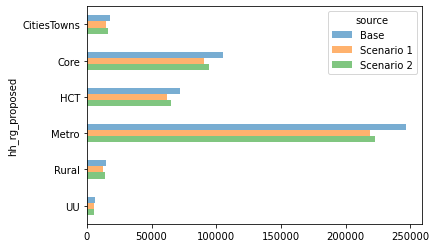

In [8]:
df = load_data('3_transit_trips.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='trexpfac')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

## Transit Commute Mode Share

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
CitiesTowns,3.7%,3.0%,3.4%
Core,6.4%,5.1%,5.6%
HCT,5.0%,4.1%,4.4%
Metro,7.9%,6.5%,7.2%
Rural,2.5%,2.1%,2.4%
UU,3.0%,2.4%,2.8%


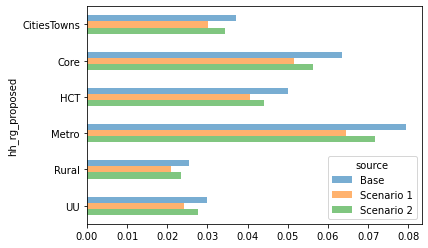

In [9]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('4_transit_commute_share.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='mode_share')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# VMT

source,Base,Scenario 1,Scenario 2
hh_rg_proposed,,,
Core,"601,705","548,555","533,528"
HCT,"28,372","26,386","26,092"
Metro,"970,678","849,573","830,945"
UU,"11,582","10,883","10,836"
Total,"1,612,337","1,435,397","1,401,401"


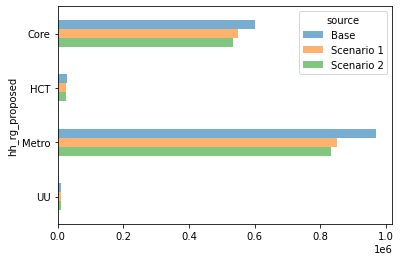

In [10]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index='hh_rg_proposed', columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

# Delay